Evaluasi Training Data:
R² Score : 0.8091
MAE      : 0.0050
RMSE     : 0.0062

Evaluasi Test Data:
R² Score : 0.8569
MAE      : 0.0048
RMSE     : 0.0060


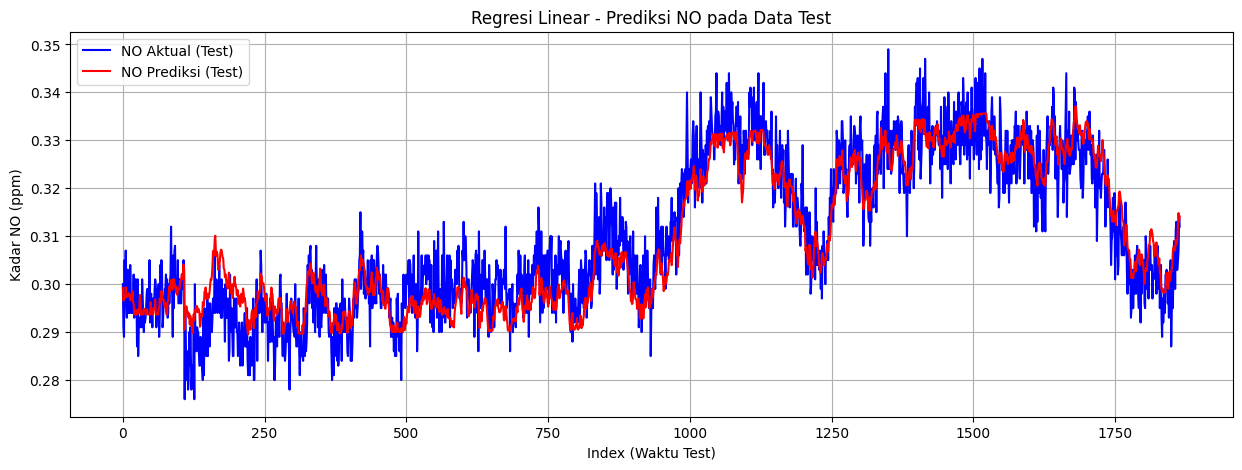

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("dataseth.xlsx")
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# === Fitur dan target ===
features = ['distance', 'speed']
target = 'no'   # target untuk NO

X = df[features]
y = df[target]

# === Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series → jangan diacak
)

# === Bangun model regresi linear ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

with pd.ExcelWriter("hasil_split.xlsx") as writer:
    train_data.to_excel(writer, sheet_name="Train", index=False)
    test_data.to_excel(writer, sheet_name="Test", index=False)

# === Evaluasi ===
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Evaluasi Training Data:")
print(f"R² Score : {r2_train:.4f}")
print(f"MAE      : {mae_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")

print("\nEvaluasi Test Data:")
print(f"R² Score : {r2_test:.4f}")
print(f"MAE      : {mae_test:.4f}")
print(f"RMSE     : {rmse_test:.4f}")

# === Visualisasi hasil prediksi ===
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label="NO Aktual (Test)", color='blue')
plt.plot(y_test_pred, label="NO Prediksi (Test)", color='red')
plt.xlabel("Index (Waktu Test)")
plt.ylabel("Kadar NO (ppm)")
plt.title("Regresi Linear - Prediksi NO pada Data Test")
plt.legend()
plt.grid(True)
plt.show()

# w & B
# Ambil koefisien (weight) dan intercept (bias)
weights = model.coef_
bias = model.intercept_

# Simpan ke DataFrame
coef_df = pd.DataFrame({
    "Feature": features,
    "Weight (Koefisien)": weights
})

bias_df = pd.DataFrame({
    "Bias (Intercept)": [bias]
})

# Simpan ke Excel
with pd.ExcelWriter("linear_regression_weights_bias.xlsx") as writer:
    coef_df.to_excel(writer, sheet_name="Koefisien", index=False)
    bias_df.to_excel(writer, sheet_name="Bias", index=False)



Evaluasi Training Data:
R² Score : 0.9329
MAE      : 0.0058
RMSE     : 0.0072

Evaluasi Test Data:
R² Score : 0.9305
MAE      : 0.0053
RMSE     : 0.0066


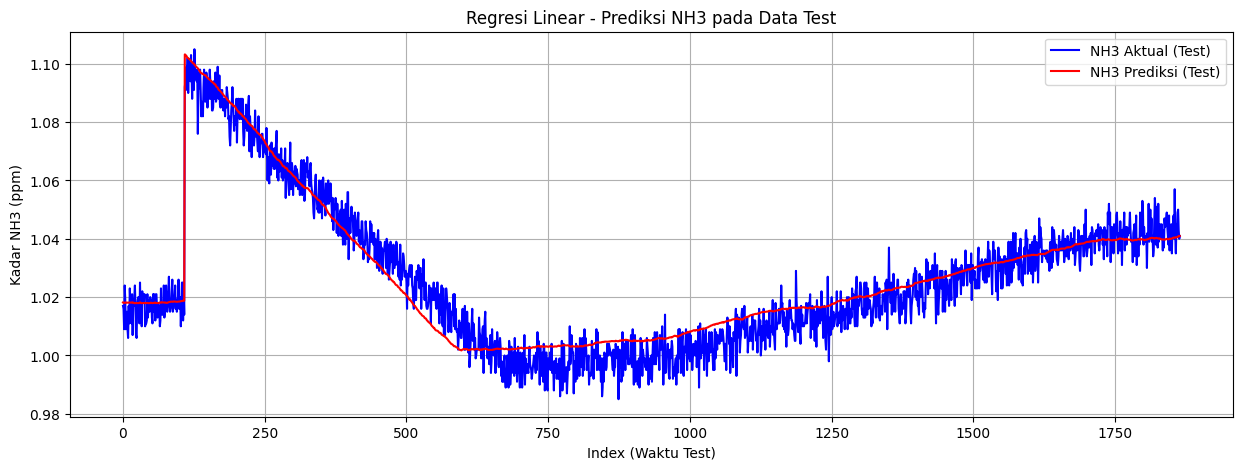

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("dataseth.xlsx")
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# === Fitur dan target ===
features = ['temperature', 'distance', 'speed']
target = 'nh3'   # target untuk NH3

X = df[features]
y = df[target]

# === Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series → jangan diacak
)

# === Bangun model regresi linear ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Evaluasi ===
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Evaluasi Training Data:")
print(f"R² Score : {r2_train:.4f}")
print(f"MAE      : {mae_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")

print("\nEvaluasi Test Data:")
print(f"R² Score : {r2_test:.4f}")
print(f"MAE      : {mae_test:.4f}")
print(f"RMSE     : {rmse_test:.4f}")

# === Visualisasi hasil prediksi ===
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label="NH3 Aktual (Test)", color='blue')
plt.plot(y_test_pred, label="NH3 Prediksi (Test)", color='red')
plt.xlabel("Index (Waktu Test)")
plt.ylabel("Kadar NH3 (ppm)")
plt.title("Regresi Linear - Prediksi NH3 pada Data Test")
plt.legend()
plt.grid(True)
plt.show()
# w & B
# Ambil koefisien (weight) dan intercept (bias)
weights = model.coef_
bias = model.intercept_

# Simpan ke DataFrame
coef_df = pd.DataFrame({
    "Feature": features,
    "Weight (Koefisien)": weights
})

bias_df = pd.DataFrame({
    "Bias (Intercept)": [bias]
})

# Simpan ke Excel
with pd.ExcelWriter("linear_regression_weights_bias.xlsx") as writer:
    coef_df.to_excel(writer, sheet_name="Koefisien", index=False)
    bias_df.to_excel(writer, sheet_name="Bias", index=False)


Evaluasi Training Data:
R² Score : 0.9551
MAE      : 0.0656
RMSE     : 0.0797

Evaluasi Test Data:
R² Score : 0.9690
MAE      : 0.0635
RMSE     : 0.0767


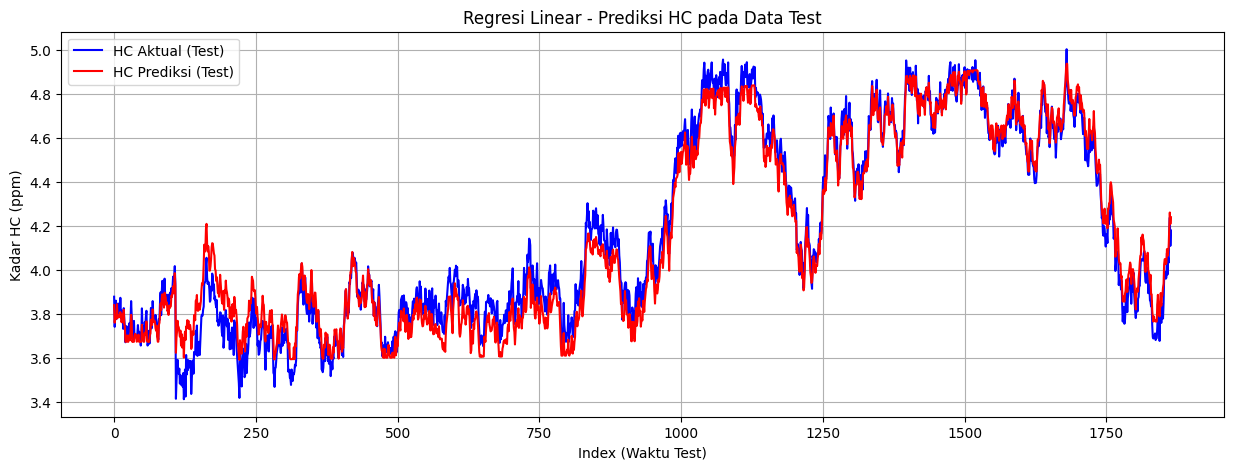

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("dataseth.xlsx")
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# === Fitur dan target ===
features = ['distance', 'speed']
target = 'hc'   # target untuk HC

X = df[features]
y = df[target]

# === Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series → jangan diacak
)

# === Bangun model regresi linear ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Evaluasi ===
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Evaluasi Training Data:")
print(f"R² Score : {r2_train:.4f}")
print(f"MAE      : {mae_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")

print("\nEvaluasi Test Data:")
print(f"R² Score : {r2_test:.4f}")
print(f"MAE      : {mae_test:.4f}")
print(f"RMSE     : {rmse_test:.4f}")

# === Visualisasi hasil prediksi ===
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label="HC Aktual (Test)", color='blue')
plt.plot(y_test_pred, label="HC Prediksi (Test)", color='red')
plt.xlabel("Index (Waktu Test)")
plt.ylabel("Kadar HC (ppm)")
plt.title("Regresi Linear - Prediksi HC pada Data Test")
plt.legend()
plt.grid(True)
plt.show()
# w & B
# Ambil koefisien (weight) dan intercept (bias)
weights = model.coef_
bias = model.intercept_

# Simpan ke DataFrame
coef_df = pd.DataFrame({
    "Feature": features,
    "Weight (Koefisien)": weights
})

bias_df = pd.DataFrame({
    "Bias (Intercept)": [bias]
})

# Simpan ke Excel
with pd.ExcelWriter("linear_regression_weights_bias.xlsx") as writer:
    coef_df.to_excel(writer, sheet_name="Koefisien", index=False)
    bias_df.to_excel(writer, sheet_name="Bias", index=False)


Evaluasi Training Data:
R² Score : 0.9721
MAE      : 0.0053
RMSE     : 0.0067

Evaluasi Test Data:
R² Score : 0.9781
MAE      : 0.0049
RMSE     : 0.0061


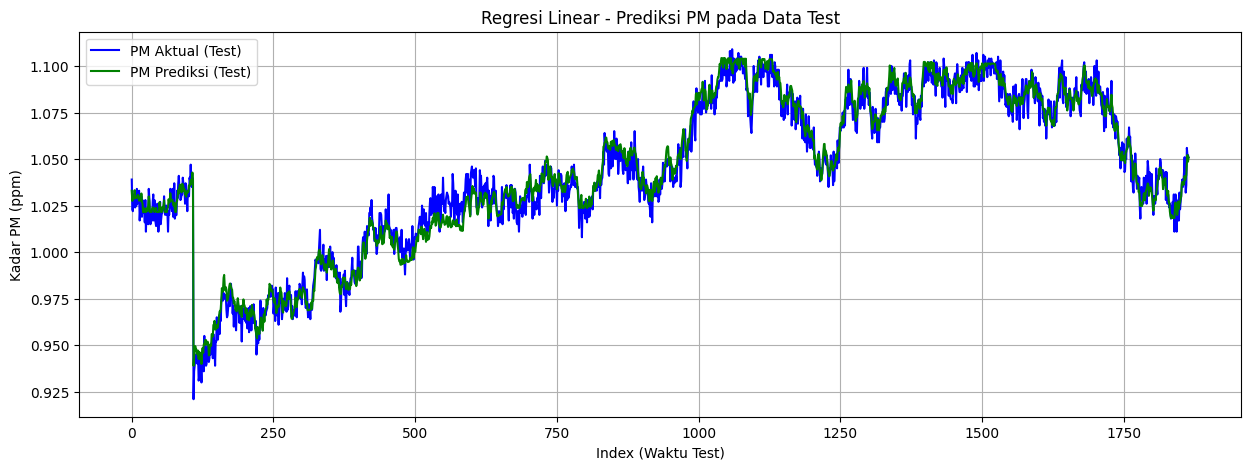

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("dataseth.xlsx")
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# === Fitur dan target ===
features = ['humidity', 'distance', 'speed']
target = 'pm'   # target untuk PM

X = df[features]
y = df[target]

# === Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series → jangan diacak
)

# === Bangun model regresi linear ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Evaluasi ===
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Evaluasi Training Data:")
print(f"R² Score : {r2_train:.4f}")
print(f"MAE      : {mae_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")

print("\nEvaluasi Test Data:")
print(f"R² Score : {r2_test:.4f}")
print(f"MAE      : {mae_test:.4f}")
print(f"RMSE     : {rmse_test:.4f}")

# === Visualisasi hasil prediksi ===
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label="PM Aktual (Test)", color='blue')
plt.plot(y_test_pred, label="PM Prediksi (Test)", color='green')
plt.xlabel("Index (Waktu Test)")
plt.ylabel("Kadar PM (ppm)")
plt.title("Regresi Linear - Prediksi PM pada Data Test")
plt.legend()
plt.grid(True)
plt.show()

# w & B
# Ambil koefisien (weight) dan intercept (bias)
weights = model.coef_
bias = model.intercept_

# Simpan ke DataFrame
coef_df = pd.DataFrame({
    "Feature": features,
    "Weight (Koefisien)": weights
})

bias_df = pd.DataFrame({
    "Bias (Intercept)": [bias]
})

# Simpan ke Excel
with pd.ExcelWriter("linear_regression_weights_bias.xlsx") as writer:
    coef_df.to_excel(writer, sheet_name="Koefisien", index=False)
    bias_df.to_excel(writer, sheet_name="Bias", index=False)


Evaluasi Training Data:
R² Score : 0.9677
MAE      : 0.9406
RMSE     : 1.1849

Evaluasi Test Data:
R² Score : 0.9773
MAE      : 0.8832
RMSE     : 1.1077


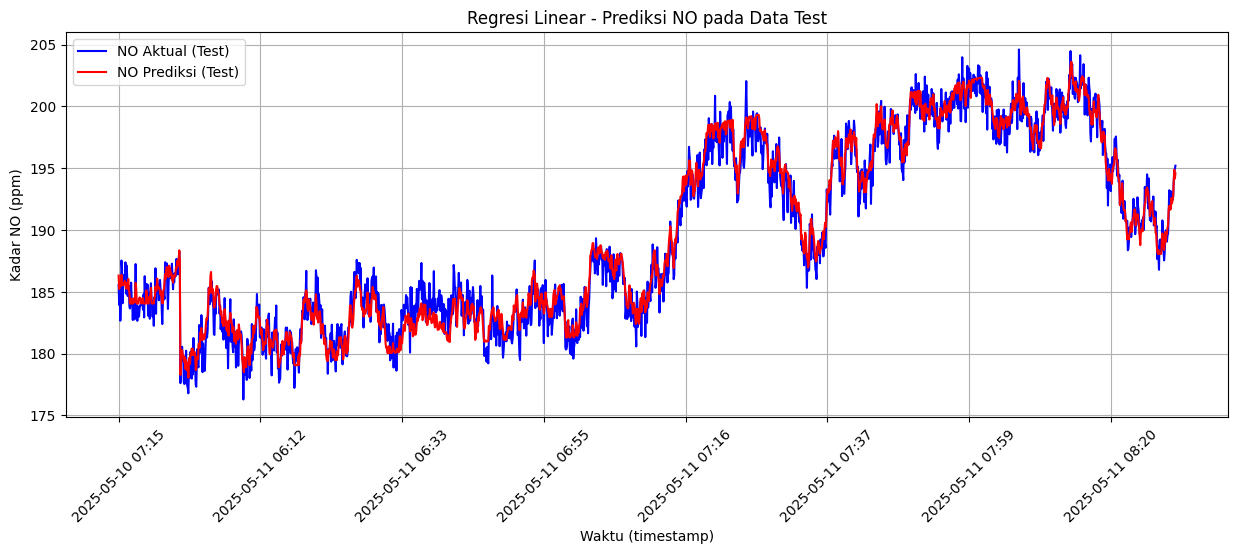

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("dataseth.xlsx")
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# === Fitur dan target ===
features = ['humidity', 'distance', 'speed']
target = 'co'

X = df[features]
y = df[target]

# === Split data 80:20 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-series → jangan acak
)

# === Bangun model regresi linear ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Evaluasi ===
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Evaluasi Training Data:")
print(f"R² Score : {r2_train:.4f}")
print(f"MAE      : {mae_train:.4f}")
print(f"RMSE     : {rmse_train:.4f}")

print("\nEvaluasi Test Data:")
print(f"R² Score : {r2_test:.4f}")
print(f"MAE      : {mae_test:.4f}")
print(f"RMSE     : {rmse_test:.4f}")

# === Visualisasi hasil prediksi ===
plt.figure(figsize=(15,5))

# Buat index numerik
indices = np.arange(len(timestamps_test))

# Plot pakai index
plt.plot(indices, y_test.values, label="NO Aktual (Test)", color='blue')
plt.plot(indices, y_test_pred, label="NO Prediksi (Test)", color='red')

# xticks per 250 data, label pakai timestamp
step = 250
plt.xticks(
    ticks=indices[::step],
    labels=timestamps_test.iloc[::step].dt.strftime('%Y-%m-%d %H:%M'),
    rotation=45
)

plt.xlabel("Waktu (timestamp)")
plt.ylabel("Kadar NO (ppm)")
plt.title("Regresi Linear - Prediksi NO pada Data Test")
plt.legend()
plt.grid(True)
plt.show()
